In [1]:
import pandas as pd
df = pd.read_csv('loan default prediction.csv')

In [2]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df.shape

(5000, 14)

In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
df.describe()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)

In [8]:
#Fixing negative values in the experience as we can see the min value of experience

df.loc[df['Experience'] < 0, 'Experience'] = None
#find those values in experience which are Negative
# , Experience ->  Checking those cells in experience
#None = Replaces them with a missing value

#now lets fill those missing values by taking the median of the experience column
df['Experience'] = df['Experience'].fillna(df['Experience'].median())




In [9]:
df.describe()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.327600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.253035,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,11.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1


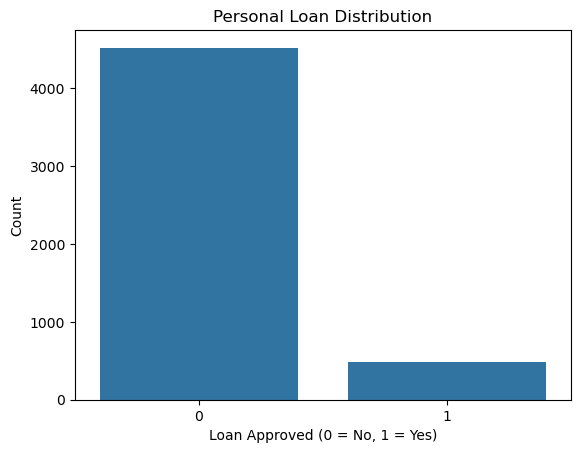

Personal Loan
0    4520
1     480
Name: count, dtype: int64


In [11]:
#Checking class balance  as we know Personal loan is our class balance

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Personal Loan')
plt.title("Personal Loan Distribution")
plt.xlabel("Loan Approved (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

print(df['Personal Loan'].value_counts())


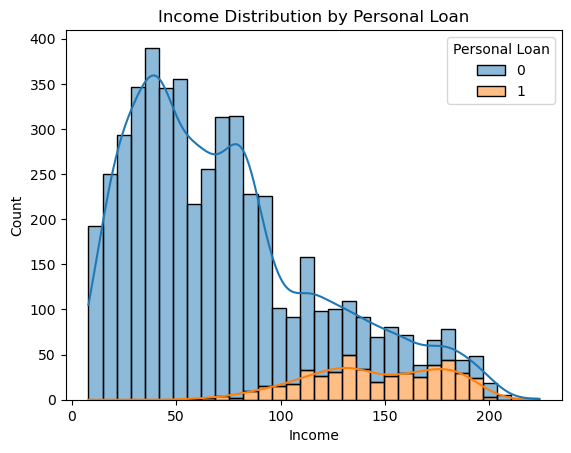

In [12]:
sns.histplot(data=df, x='Income', hue='Personal Loan', kde=True, multiple='stack')
plt.title('Income Distribution by Personal Loan')
plt.show()

In [13]:
#as we can see when income is increasing loan approval is also increasing

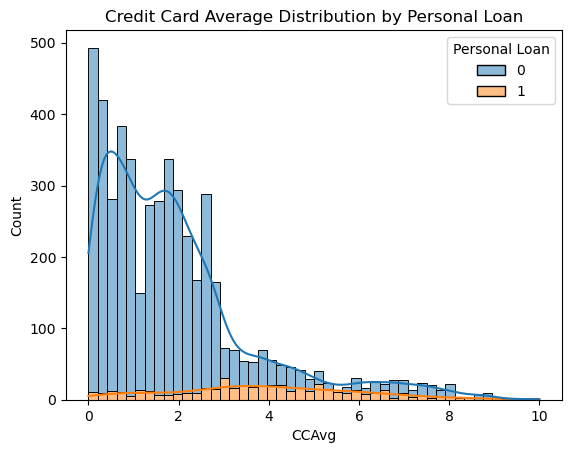

In [14]:
sns.histplot(data=df, x='CCAvg', hue='Personal Loan', kde=True, multiple='stack')
plt.title('Credit Card Average Distribution by Personal Loan')
plt.show()

In [15]:
# Credit Card average is not affecting much on loan approval

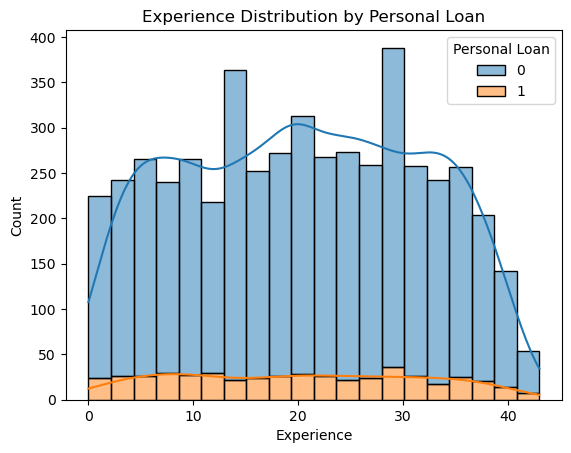

In [16]:
sns.histplot(data=df, x='Experience', hue='Personal Loan', kde=True, multiple='stack')
plt.title('Experience Distribution by Personal Loan')
plt.show()

In [17]:
# Work Experience is also not affecting much on loan approval

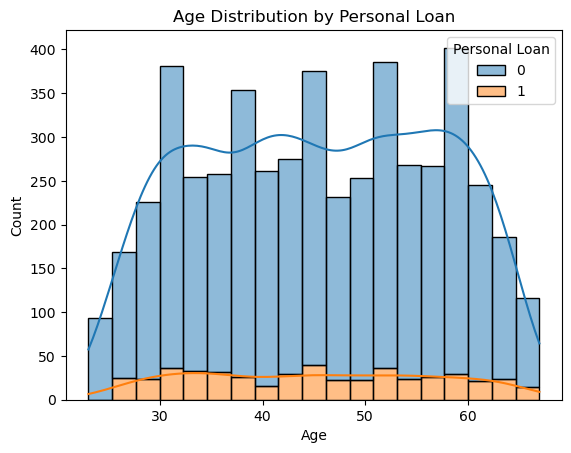

In [18]:
sns.histplot(data=df, x='Age', hue='Personal Loan', kde=True, multiple='stack')
plt.title('Age Distribution by Personal Loan')
plt.show()

In [19]:
# Age is also not affecting much on loan approval

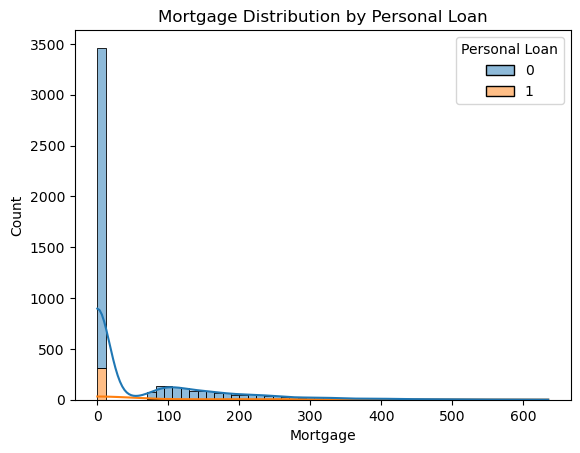

In [20]:
sns.histplot(data=df, x='Mortgage', hue='Personal Loan', kde=True, multiple='stack')
plt.title('Mortgage Distribution by Personal Loan')
plt.show()

In [21]:
#Mortage is also not affecting much on loan approval

In [22]:
# we use histogram for discrete values like 11.5 ,22 values
# we use countplot for values like 0 and 1

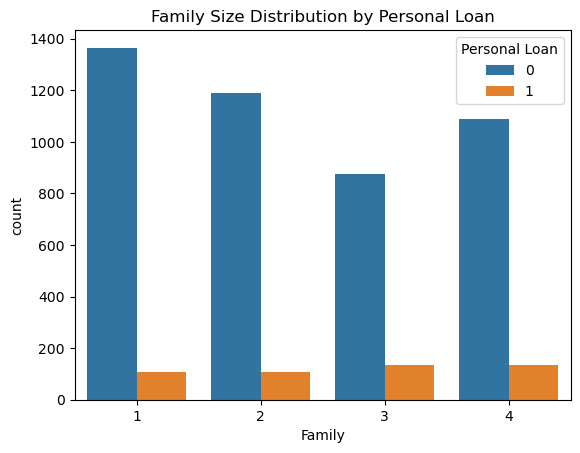

In [23]:
sns.countplot(data=df, x='Family', hue='Personal Loan')
plt.title('Family Size Distribution by Personal Loan')
plt.show()

In [24]:
# as we can see if anyone has 3 or 4 members then the loan rejection is less in 3 but still there is not much difference between them 

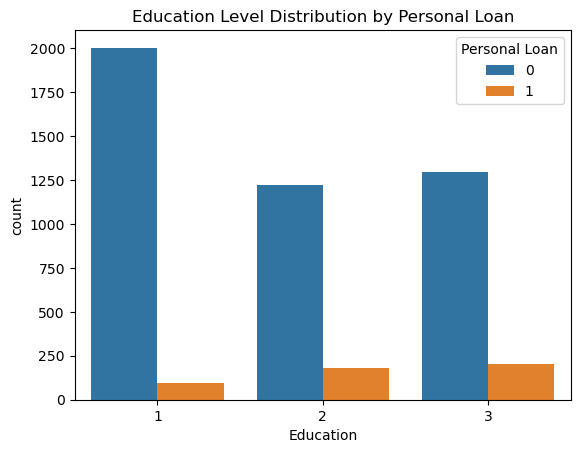

In [25]:
sns.countplot(data=df, x='Education', hue='Personal Loan')
plt.title('Education Level Distribution by Personal Loan')
plt.show()

In [26]:
# loan rejection rate is high for 1 (undergraduate students)
#loan rejection is less for 2 and 3 (graduate and professionals)
#But still there is not much difference between all of them

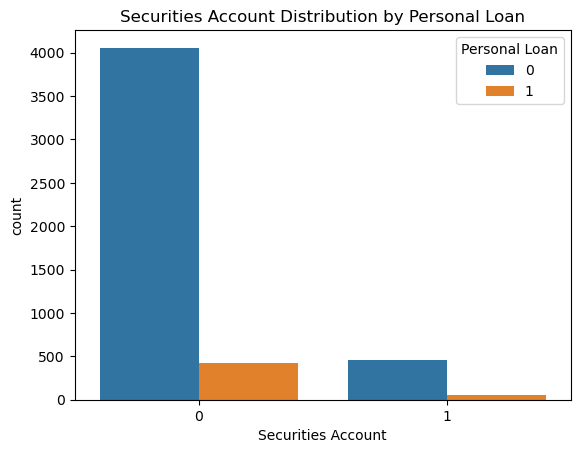

In [27]:
sns.countplot(data=df, x='Securities Account', hue='Personal Loan')
plt.title('Securities Account Distribution by Personal Loan')
plt.show()

In [28]:
#if a customer donot have a investment account in a bank it is likely that this thing can play a part in getting him a loan

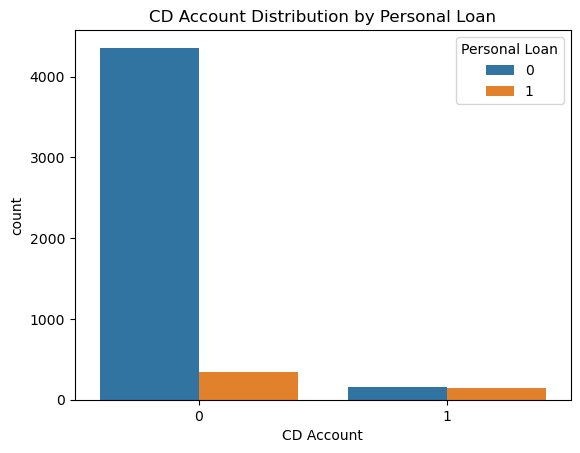

In [29]:
sns.countplot(data=df, x='CD Account', hue='Personal Loan')
plt.title('CD Account Distribution by Personal Loan')
plt.show()

In [30]:
#if person dont have a cd account he can get a loan but still there is not a much difference

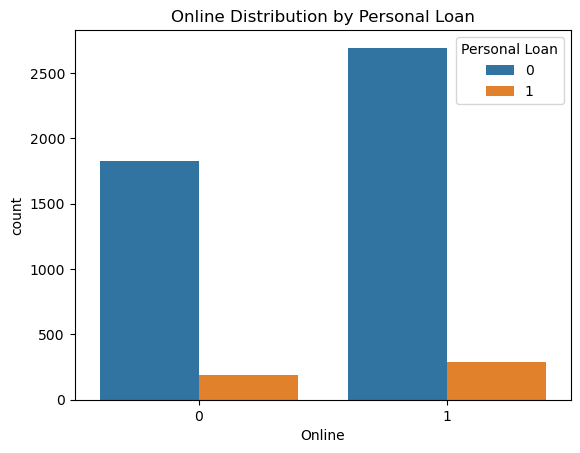

In [31]:
sns.countplot(data=df, x='Online', hue='Personal Loan')
plt.title('Online Distribution by Personal Loan')
plt.show()

In [32]:
#if a person is using online bank services then there is a slight chance that he will get a loan

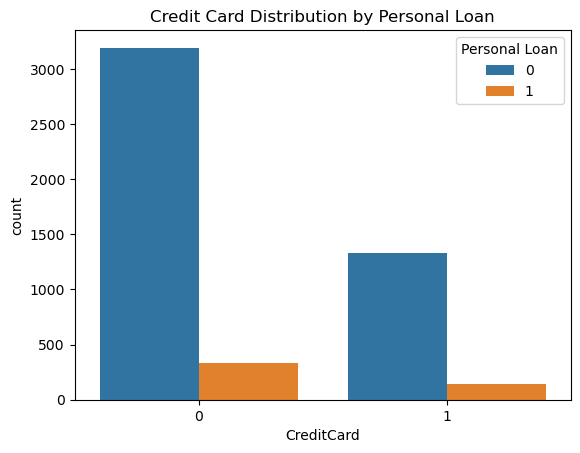

In [33]:
sns.countplot(data=df, x='CreditCard', hue='Personal Loan')
plt.title('Credit Card Distribution by Personal Loan')
plt.show()

In [34]:
# person who is not using credit card has a slight more chance to get a loan

In [35]:
#Now lets move on to box plot which we only use for numerical features

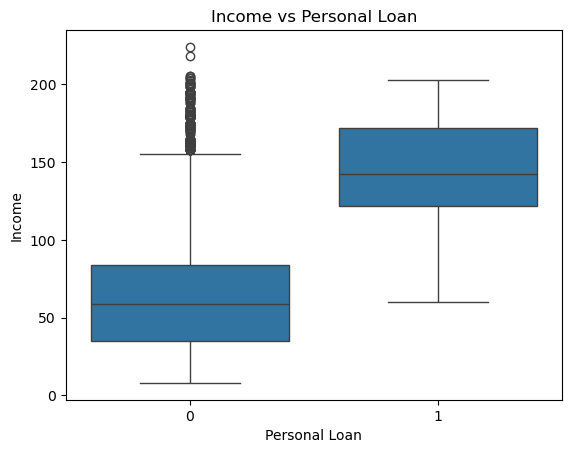

In [36]:
sns.boxplot(x='Personal Loan', y='Income', data=df)
plt.title('Income vs Personal Loan')
plt.show()

In [37]:
#Higher income → higher chance of taking personal loan

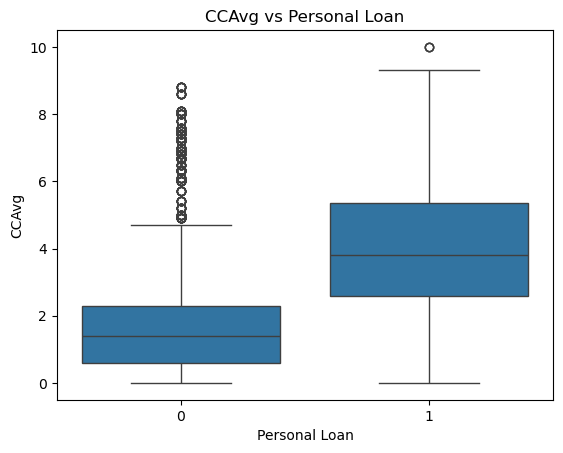

In [38]:
sns.boxplot(x='Personal Loan', y='CCAvg', data=df)
plt.title('CCAvg vs Personal Loan')
plt.show()

In [39]:
#The higher the credit card spending, the more likely customers are to take personal loans

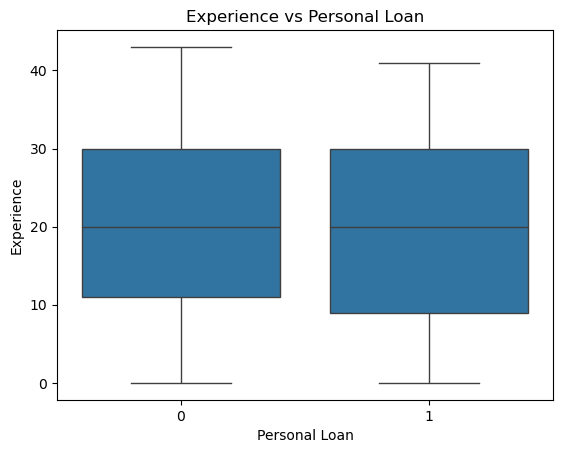

In [40]:
sns.boxplot(x='Personal Loan', y='Experience', data=df)
plt.title('Experience vs Personal Loan')
plt.show()

In [41]:
#Experience doesn’t seem to have much impact on whether someone takes a personal loan


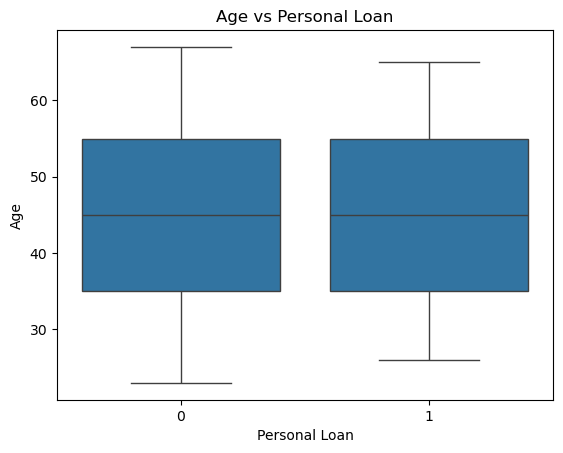

In [42]:
sns.boxplot(x='Personal Loan', y='Age', data=df)
plt.title('Age vs Personal Loan')
plt.show()

In [43]:
# As Experience , Age doesn’t seem to have much impact on whether someone takes a personal loan


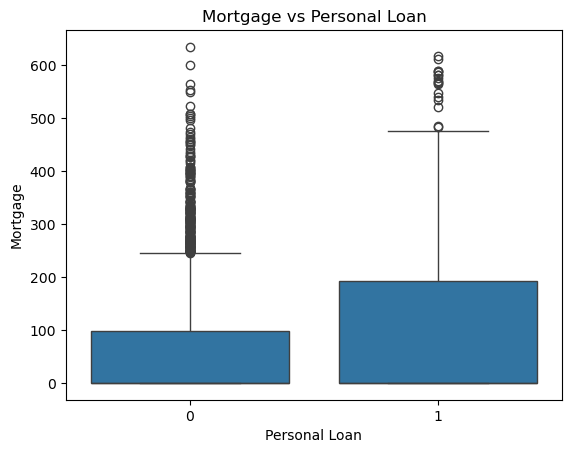

In [44]:
sns.boxplot(x='Personal Loan', y='Mortgage', data=df)
plt.title('Mortgage vs Personal Loan')
plt.show()

In [45]:
#The higher the mortgage, the more likely customers are to take personal loans

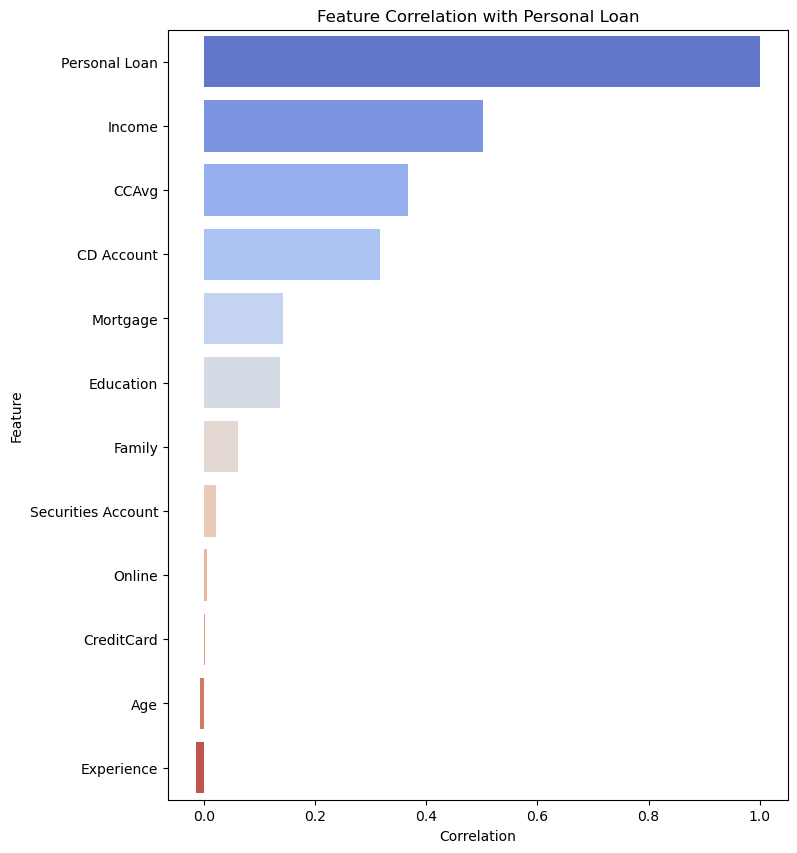

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

correlations = df.corr()['Personal Loan'].sort_values(ascending=False).reset_index()
correlations.columns = ['Feature', 'Correlation']

plt.figure(figsize=(8, 10))
sns.barplot(
    data=correlations,
    x='Correlation',
    y='Feature',
    hue='Feature',  # set hue explicitly
    palette='coolwarm',
    legend=False    # remove redundant legend
)
plt.title('Feature Correlation with Personal Loan')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()


In [47]:
correlation = df.corr()

target_corr = correlation['Personal Loan'].sort_values(ascending=False)

print(target_corr)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
Age                  -0.007726
Experience           -0.014013
Name: Personal Loan, dtype: float64


In [48]:
# Income has strong positive correlation with loan approval
# CCAvg (Credit Card Avg spend) is moderately positively correlated
# CD Account holders are more likely to get loans
# Education level shows a slight positive effect
# Mortgage has a weak positive correlation
# Other features like Age, Experience, Online, CreditCard, etc., show almost no correlation


In [108]:
# lets use decision trees

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [118]:
X=df.drop('Personal Loan',axis=1)
y=df['Personal Loan']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [128]:
model = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)


In [130]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [132]:
y_pred=model.predict(X_test)

In [134]:
from sklearn.metrics import accuracy_score

In [136]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy : ", round(accuracy,2))

Accuracy :  0.95


In [138]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.95      0.97       904
           1       0.66      0.99      0.79        96

    accuracy                           0.95      1000
   macro avg       0.83      0.97      0.88      1000
weighted avg       0.97      0.95      0.95      1000



In [140]:
# 📊 Model Performance Summary:
# The model achieves a high overall accuracy of 95%.
# It performs extremely well on the majority class (0 - No Loan) with perfect precision (1.00) and high recall (0.95).
# For the minority class (1 - Yes Loan), recall is excellent (0.99), meaning almost all actual loan approvals are detected.
# However, precision for class 1 is lower (0.66), indicating some false positives.
# The model is strong in identifying defaulters (high recall), but there's room to improve precision to reduce false alarms.


In [142]:
#lets use Xgboost

In [144]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 163.8 kB/s eta 0:15:16
   ---------------------------------------- 0.0/150.0 MB 178.6 kB/s eta 0:14:00
   ---------------------------------------- 0.1/150.0 MB 348.6 kB/s eta 0:07:10
   ---------------------------------------- 0.2/150.0 MB 689.9 kB/s eta 0:03:38
   ---------------------------------------- 0.3/150.0 MB 999.0 kB/s eta 0:02:30
   ---------------------------------------- 0.5/150.0 MB 1.2 MB/s eta 0:02:08
   ---------------------------------------- 0.8/150.0 MB 1.9 MB/s eta 0:01:17
   ---------------------------------------- 1.0/150.0 MB 2.1 MB/s eta 0:01:13
   ---------------------------------------- 1.0/150.0 MB 2.1 MB/s eta 0:01:13
   -

In [150]:
from xgboost import XGBClassifier

model = XGBClassifier(
    max_depth=5,               # Limits the depth of each decision tree to avoid overfitting
    learning_rate=0.1,         # Controls how much each new tree corrects the previous one (lower = slower but safer learning)
    n_estimators=100,          # Number of boosting rounds (i.e., total number of trees to build)
    scale_pos_weight=10,       # Tells the model to pay more attention to the minority class (helps with class imbalance)
    eval_metric='logloss',     # Uses log loss to evaluate model performance during training (suitable for binary classification)
    random_state=42            # Ensures reproducible results by fixing the random seed
)


In [152]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       904
           1       0.85      0.98      0.91        96

    accuracy                           0.98      1000
   macro avg       0.92      0.98      0.95      1000
weighted avg       0.98      0.98      0.98      1000



In [156]:
# lets tune

In [162]:
model = XGBClassifier(
    scale_pos_weight=10,   # handle class imbalance
    eval_metric='logloss', # use log loss for evaluation
    random_state=42
)

In [164]:
param_grid = {
    'max_depth': [3, 5],           # Try trees of depth 3 and 5
    'learning_rate': [0.05, 0.1],  # Try slow and medium learning speed
    'n_estimators': [100, 200]     # Try building 100 and 200 trees
}

In [172]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring='f1',    # Focus on F1 score (balance of precision & recall)
                    cv=3,            # Use 3-fold cross-validation
                    verbose=1, #keep me updated while you try different combinations
                    n_jobs=-1) 

In [176]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [178]:
print("Best parameters found:", grid.best_params_)

Best parameters found: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [180]:
best_model = grid.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the new model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       904
           1       0.85      0.98      0.91        96

    accuracy                           0.98      1000
   macro avg       0.92      0.98      0.95      1000
weighted avg       0.98      0.98      0.98      1000



In [182]:
# 📌 Model Evaluation:
# - Accuracy: 98% → Model performs very well overall.
# - Class 0 (Non-defaulters): Perfect precision, high recall (98%).
# - Class 1 (Defaulters): Good precision (85%) and excellent recall (98%) — catches almost all defaulters.
# - F1-scores are high → Model balances precision and recall well.
# ✅ Strong performance, especially important for detecting defaulters.
